# 기본 세팅

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,582 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [2]:
! pip install catboost
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.8 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import random
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)


from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import RobustScaler
from scipy.signal import savgol_filter
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.preprocessing import MinMaxScaler

import warnings

# 모든 경고 메시지 끄기
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기


In [5]:
peach = pd.read_csv('/content/drive/MyDrive/복숭아 개화 데이터.csv',encoding='cp949')
pear = pd.read_csv('/content/drive/MyDrive/배 개화 데이터.csv',encoding='cp949')

# X변수 Y변수 지정

In [6]:
data= peach.copy()
x_col=[ '위도', '경도', '고도', '2_일강수량(mm)_sum', '3_일강수량(mm)_sum',
       '2_최고기온(°C)_max', '3_최고기온(°C)_max', '2_최고기온(°C)_mean',
       '3_최고기온(°C)_mean', '2_최고기온(°C)_min', '3_최고기온(°C)_min', '2_최저기온(°C)_max',
       '3_최저기온(°C)_max', '2_최저기온(°C)_mean', '3_최저기온(°C)_mean',
       '2_최저기온(°C)_min', '3_최저기온(°C)_min', '2_평균기온(°C)_max', '3_평균기온(°C)_max',
       '2_평균기온(°C)_mean', '3_평균기온(°C)_mean', '2_평균기온(°C)_min',
       '3_평균기온(°C)_min', '2_합계 일조시간(hr)_sum', '3_합계 일조시간(hr)_sum',
        '서리365']
y_col='365'

#모델 세팅

In [7]:
models = {'rf': RandomForestRegressor(random_state=0), #랜포

          'xgbr':xgb.XGBRegressor(),# xgb

          'lgbm':lgb.LGBMRegressor(force_col_wise=True), #lgbm

          'svr': SVR(), #svr

          'ard': linear_model.ARDRegression(),#ard

          'bayesian_ridge': linear_model.BayesianRidge(),#ridge

          'lasso': linear_model.Lasso(alpha=0),#lasso

          'cbr': CatBoostRegressor(verbose=False), #catboost

          'etr': ExtraTreeRegressor(random_state=0,max_depth=100), # extra tree regressor

          'mlp': MLPRegressor(random_state=1, max_iter=1000), # MLP

          'ada': AdaBoostRegressor(random_state=0), # AdaBoost Regressor

          'sgdr' : make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3)),# SGDRegressor

          'knn' : KNeighborsRegressor(n_neighbors=5), # KNeighborsRegressor

          'hgbr' : HistGradientBoostingRegressor(),

          'ols':LinearRegression() }

In [8]:
class regressor:
    def __init__(self, model1=None, model2=None):
        if model1 is None:
            self.model1 = CatBoostRegressor(verbose=False,has_time=True,random_state=6)
        else:
            self.model1 = model1

        if model2 is None:
            self.model2 = lgb.LGBMRegressor(random_state=6)
        else:
            self.model2 = model2

        self.model3 = None
        self.model4 = None

    def fit(self, x_train, y_train):
        # 1차 적합
        self.model1.fit(x_train,y_train)
        train_fitted_values = self.model1.predict(x_train)
        train_residual = y_train - train_fitted_values

        # 2차 적합
        self.model2.fit(x_train, train_residual)
        train_fitted_values2 = self.model2.predict(x_train)
        train_residual2 = train_residual - train_fitted_values2

        # 3차 적합
        self.model3 = lgb.LGBMRegressor(random_state=6)
        self.model3.fit(x_train, train_residual2)
        train_fitted_values3 = self.model3.predict(x_train)
        train_residual3 = train_residual2 - train_fitted_values3

        # 4차 적합
        self.model4 = lgb.LGBMRegressor(random_state=6)
        self.model4.fit(x_train, train_residual3)

    def predict(self, x_test):
        test_fitted_values = self.model1.predict(x_test)
        test_fitted_values2 = self.model2.predict(x_test)
        test_fitted_values3 = self.model3.predict(x_test)
        test_residual = self.model4.predict(x_test)

        return test_fitted_values + test_fitted_values2 + test_fitted_values3 + test_residual

    def evaluate(self, x_test, y_test):
        y_pred = self.predict(x_test)
        score = mean_absolute_error(y_test, y_pred)
        return score

In [9]:
reg = regressor(model1=models['cbr'],model2=models['rf'])

# 교차검증을 통한 모델의 성능 확인

In [10]:
def cv(model,x_data,y_data,metric='both'):
  X = x_data
  y = y_data

  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  mae_scores = []
  rmse_scores = []

  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]

      model.fit(X_train, y_train)

      y_pred = model.predict(X_test)

      mae = mean_absolute_error(y_test, y_pred)
      rmse = np.sqrt(mean_squared_error(y_test, y_pred))

      mae_scores.append(mae)
      rmse_scores.append(rmse)

  mean_mae = np.mean(mae_scores)
  mean_rmse = np.mean(rmse_scores)

  score = {'mae': mean_mae,'rmse':mean_rmse }

  if metric == 'both':
    result = score
  else:
    result = score[metric]

  return result

In [62]:
for model in models.keys():
  score = cv(x_data=data[x_col],y_data=data[y_col],model=models[model])
  print(f'{model}: {score}')

rf: {'mae': 3.635416445623342, 'rmse': 5.080906207265589}
xgbr: {'mae': 3.862029110531592, 'rmse': 5.372202303904403}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4571
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 26
[LightGBM] [Info] Start training from score 98.965517
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4577
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 26
[LightGBM] [Info] Start training from score 98.838859
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 4580
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 26
[LightGBM] [Info] Start training from score 98.747347
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Tota

랜덤 포레스트, xgbr , lgbm , bayesian ridge, lasso , catboost ,sgdr의 성능이 좋음을 확인
- rf: {'mae': 3.6356127320954905, 'rmse': 5.060880580847784}
- xgbr: {'mae': 3.831605869768785, 'rmse': 5.321131691098173}
- lgbm: {'mae': 3.604155052325961, 'rmse': 5.01640373934149}
- ard: {'mae': 3.8534396036124945, 'rmse': 5.238667180867486}
- bayesian_ridge: {'mae': 3.839522639245536, 'rmse': 5.22133879040976}
- lasso: {'mae': 3.8458194023678303, 'rmse': 5.224477027973575}
- cbr: {'mae': 3.4699339191819276, 'rmse': 4.886189643059495}
- sgdr: {'mae': 3.8791112636544502, 'rmse': 5.2590895242032}

In [59]:
cv(x_data=data[x_col],y_data=data[y_col],model=reg)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4571
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 26
[LightGBM] [Info] Start training from score 0.003301
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4571
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 26
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhe

{'mae': 3.461203344202102, 'rmse': 4.8824263682940385}

# 변수 필터링 - 성능 더 안좋아짐




## SelectKbest

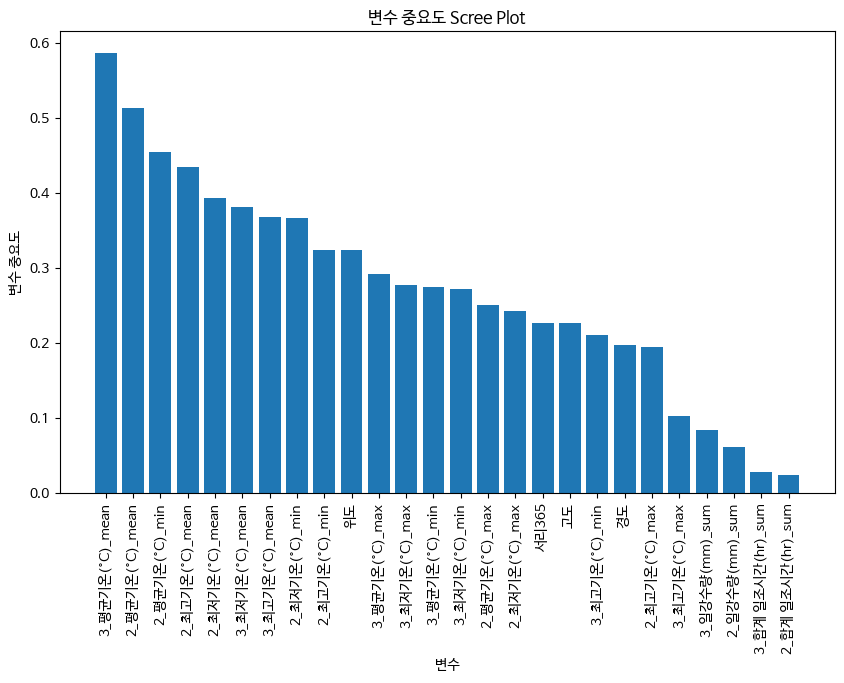

                   변수       중요도
0     3_평균기온(°C)_mean  0.586277
1     2_평균기온(°C)_mean  0.512824
2      2_평균기온(°C)_min  0.453779
3     2_최고기온(°C)_mean  0.434827
4     2_최저기온(°C)_mean  0.392907
5     3_최저기온(°C)_mean  0.380892
6     3_최고기온(°C)_mean  0.367137
7      2_최저기온(°C)_min  0.365962
8      2_최고기온(°C)_min  0.324143
9                  위도  0.323187
10     3_평균기온(°C)_max  0.291138
11     3_최저기온(°C)_max  0.277338
12     3_평균기온(°C)_min  0.274166
13     3_최저기온(°C)_min  0.271507
14     2_평균기온(°C)_max  0.250266
15     2_최저기온(°C)_max  0.242740
16              서리365  0.226020
17                 고도  0.225649
18     3_최고기온(°C)_min  0.210577
19                 경도  0.196758
20     2_최고기온(°C)_max  0.194033
21     3_최고기온(°C)_max  0.102006
22     3_일강수량(mm)_sum  0.084369
23     2_일강수량(mm)_sum  0.061197
24  3_합계 일조시간(hr)_sum  0.027537
25  2_합계 일조시간(hr)_sum  0.024232


In [51]:
from sklearn.feature_selection import SelectKBest, f_regression ,mutual_info_regression

x = data[x_col]
y = data[y_col]

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

# 변수 중요도를 가져옵니다.
scores = selector.scores_

# 중요도를 내림차순으로 정렬합니다.
sorted_indices = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_indices]

# 변수 중요도를 데이터프레임으로 확인합니다.
sorted_columns = np.array(x.columns.tolist())[sorted_indices]
variable_importance_df = pd.DataFrame({'변수': sorted_columns, '중요도': sorted_scores})

# Scree plot을 그립니다.
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores)
plt.xticks(range(len(sorted_scores)), sorted_columns, rotation=90)  # x 축 레이블을 변수 이름으로 설정
plt.xlabel('변수')
plt.ylabel('변수 중요도')
plt.title('변수 중요도 Scree Plot')
plt.show()

# 변수 중요도를 출력합니다.
print(variable_importance_df)

In [45]:
selected = variable_importance_df['변수'][0:16].tolist()

In [46]:
for model in models.keys():
  score = cv(x_data=data[selected],y_data=data[y_col],model=models[model])
  print(f'{model}: {score}')

rf: {'mae': 3.679718832891247, 'rmse': 5.127688822790712}
xgbr: {'mae': 3.9087037751782163, 'rmse': 5.383210645599196}
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 16
[LightGBM] [Info] Start training from score 98.965517
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 16
[LightGBM] [Info] Start training from score 98.838859
[LightGBM] [Info] Total Bins 2829
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 16
[LightGBM] [Info] Start training from score 98.747347
[LightGBM] [Info] Total Bins 2827
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 16
[LightGBM] [Info] Start training from score 99.066313
[LightGBM] [Info] Total Bins 2829
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 16
[LightGBM] [Info] Start training fr

## 논문 기준 필터링 - 성능 더 안 좋아짐

*연구를 통해 2015년의 한반도 벚꽃개화시기를 확인해 본
결과, 2월의 평균기온, 3월의 최저 및 최고기온, 3월의 강수량, 3월의 일조량이 유의한 변수였다.*



In [52]:
paper = ['2_평균기온(°C)_mean',
         '3_최고기온(°C)_max',
         '3_최저기온(°C)_min',
         '3_일강수량(mm)_sum',
         '3_합계 일조시간(hr)_sum']

for model in models.keys():
  score = cv(x_data=data[paper],y_data=data[y_col],model=models[model])
  print(f'{model}: {score}')

rf: {'mae': 4.396206896551724, 'rmse': 5.929512150201892}
xgbr: {'mae': 4.709725454315267, 'rmse': 6.368154161830712}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 5
[LightGBM] [Info] Start training from score 98.965517
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1027
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 5
[LightGBM] [Info] Start training from score 98.838859
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 1024
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 5
[LightGBM] [Info] Start training from score 98.747347
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total B

# PCA 차원축소 - 성능 더 안 좋아짐 !

In [20]:
numeric = ['2_일강수량(mm)_sum',
 '3_일강수량(mm)_sum',
 '2_최고기온(°C)_max',
 '3_최고기온(°C)_max',
 '2_최고기온(°C)_mean',
 '3_최고기온(°C)_mean',
 '2_최고기온(°C)_min',
 '3_최고기온(°C)_min',
 '2_최저기온(°C)_max',
 '3_최저기온(°C)_max',
 '2_최저기온(°C)_mean',
 '3_최저기온(°C)_mean',
 '2_최저기온(°C)_min',
 '3_최저기온(°C)_min',
 '2_평균기온(°C)_max',
 '3_평균기온(°C)_max',
 '2_평균기온(°C)_mean',
 '3_평균기온(°C)_mean',
 '2_평균기온(°C)_min',
 '3_평균기온(°C)_min',
 '2_합계 일조시간(hr)_sum',
 '3_합계 일조시간(hr)_sum']

num_scaled = StandardScaler().fit_transform(data[numeric])

pca = PCA(n_components=7)  # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(num_scaled)
principalDf = pd.DataFrame(data=printcipalComponents)

In [38]:
pd.DataFrame(pca.explained_variance_ratio_).cumsum().transpose()

,0,1,2,3,4,5,6
0,0.508154,0.61217,0.693872,0.753816,0.807313,0.855033,0.889776


In [21]:
for model in models.keys():
  score = cv(x_data=principalDf,y_data=data[y_col],model=models[model],metric='mae')
  print(f'{model}: {score}')

rf: 4.008116710875331
xgbr: 4.275591972209415
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 7
[LightGBM] [Info] Start training from score 98.965517
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 7
[LightGBM] [Info] Start training from score 98.838859
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 7
[LightGBM] [Info] Start training from score 98.747347
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 7
[LightGBM] [Info] Start training from score 99.066313
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 1508, number of used features: 7
[LightGBM] [Info] Start training from score 98.689655
lgbm: 4.1156596063287125
svr: 4.149093523842341
ard: 4.0981

# 하이퍼 파라미터 튜닝

In [28]:
def rf_objective(trial):

  rf_param = {
          'n_estimators': trial.suggest_int('n_estimators', 80, 700),
          'criterion': 'absolute_error',
          'max_depth' : trial.suggest_int('max_depth', 3, 10),
          'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
          'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
          'min_weight_fraction_leaf': 0.0,
          'max_features': trial.suggest_float('max_features', 0.1, 1.0),
          'max_leaf_nodes': None,
          'min_impurity_decrease': 0.0,
          'bootstrap': True,
          'n_jobs': -1,  # 모든 가능한 CPU 코어 사용 (-1)
          'random_state': 28
      }

  rf= RandomForestRegressor(**rf_param)

  score = cv(x_data=data[x_col],y_data=data[y_col],model=rf,metric='mae')

  return score

def lgbm_objective(trial):



  lgbm_param = { 'objective': 'regression', # 회귀
          'verbose': -1,
          'metric': 'rmse',
          'max_depth': trial.suggest_int('max_depth',3, 15),
          'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
          'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
          'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
          'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
      }

  lgbm = lgb.LGBMRegressor(**lgbm_param)

  score = cv(x_data=data[x_col],y_data=data[y_col],model=lgbm,metric='mae')

  return score

def cbrm_objective(trial):

  cbrm_param = {
        'iterations': trial.suggest_int('iterations', 1000, 20000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'depth': trial.suggest_int('depth', 1, 15),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
        'random_strength': trial.suggest_uniform('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'thread_count': 4,
        'verbose': False }

  cbrm = CatBoostRegressor(**cbrm_param,task_type = 'GPU')

  score = cv(x_data=data[x_col],y_data=data[y_col],model=cbrm,metric='mae')
  return score


## 랜덤포레스트

In [ ]:
rf_study = optuna.create_study(direction='minimize', sampler=TPESampler())
rf_study.optimize(rf_objective,n_trials=100)

## LigthGBM

In [31]:
#lgbm_study = optuna.create_study(direction='minimize', sampler=TPESampler())
lgbm_study.optimize(lgbm_objective,n_trials=100,timeout = 1800)

[I 2023-09-28 14:48:37,325] Trial 123 finished with value: 3.6214188250209913 and parameters: {'max_depth': 13, 'learning_rate': 0.007447846133989835, 'n_estimators': 2896, 'min_child_samples': 11, 'subsample': 0.8315928479566294}. Best is trial 115 with value: 3.566436758434807.
[I 2023-09-28 14:48:54,642] Trial 124 finished with value: 3.580094934636951 and parameters: {'max_depth': 15, 'learning_rate': 0.005668578700654358, 'n_estimators': 1184, 'min_child_samples': 7, 'subsample': 0.7539399315573025}. Best is trial 115 with value: 3.566436758434807.
[I 2023-09-28 14:49:29,015] Trial 125 finished with value: 3.6103345133342524 and parameters: {'max_depth': 15, 'learning_rate': 0.005791210195870647, 'n_estimators': 2774, 'min_child_samples': 8, 'subsample': 0.7941506066879999}. Best is trial 115 with value: 3.566436758434807.
[I 2023-09-28 14:50:08,702] Trial 126 finished with value: 3.562300477098275 and parameters: {'max_depth': 15, 'learning_rate': 0.009923129946328227, 'n_estimat

In [32]:
trial = lgbm_study.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))
# params {'max_depth': 15, 'learning_rate': 0.009923129946328227, 'n_estimators': 2990, 'min_child_samples': 7, 'subsample': 0.7602348533033497}

Best Trial: score 3.562300477098275,
params {'max_depth': 15, 'learning_rate': 0.009923129946328227, 'n_estimators': 2990, 'min_child_samples': 7, 'subsample': 0.7602348533033497}


## Catboost

In [ ]:
cbrm_study = optuna.create_study(direction='minimize', sampler=TPESampler())
cbrm_study.optimize(cbrm_objective,n_trials=100,timeout = 1800)

[I 2023-09-28 15:38:17,899] A new study created in memory with name: no-name-d36b7e49-938e-41b8-a64b-923013f5eab3
[I 2023-09-28 15:40:43,508] Trial 0 finished with value: 3.980912827878999 and parameters: {'iterations': 5198, 'learning_rate': 0.002838908549768963, 'depth': 1, 'l2_leaf_reg': 5.8982990362659915e-05, 'random_strength': 0.9316905584296672, 'bagging_temperature': 13.657915114024416, 'border_count': 15}. Best is trial 0 with value: 3.980912827878999.
[I 2023-09-28 16:14:55,631] Trial 1 finished with value: 3.696588385371098 and parameters: {'iterations': 11421, 'learning_rate': 0.03943648064906087, 'depth': 9, 'l2_leaf_reg': 14.349275929278557, 'random_strength': 0.6018426633517183, 'bagging_temperature': 0.46775022650413317, 'border_count': 182}. Best is trial 1 with value: 3.696588385371098.


In [ ]:
trial = cbrm_study.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 3.696588385371098,
params {'iterations': 11421, 'learning_rate': 0.03943648064906087, 'depth': 9, 'l2_leaf_reg': 14.349275929278557, 'random_strength': 0.6018426633517183, 'bagging_temperature': 0.46775022650413317, 'border_count': 182}
